<a href="https://colab.research.google.com/github/Bader-Altayar/Riyadh-population-prediction/blob/main/R_P_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [34]:
df = pd.read_csv('poplution.csv')

In [ ]:
df.shape

(676, 5)

In [ ]:
df.dtypes

Gender         object
Nationality    object
Region         object
Year            int64
Population      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       676 non-null    object
 1   Nationality  676 non-null    object
 2   Region       676 non-null    object
 3   Year         676 non-null    int64 
 4   Population   676 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.5+ KB


In [ ]:
df.head

<bound method NDFrame.head of      Gender Nationality    Region  Year  Population
0    Female   Non Saudi  Al Bahah  2010       16209
1    Female   Non Saudi  Al Bahah  2011       16521
2    Female   Non Saudi  Al Bahah  2012       16752
3    Female   Non Saudi  Al Bahah  2013       17508
4    Female   Non Saudi  Al Bahah  2014       17682
..      ...         ...       ...   ...         ...
671    Male       Saudi     Tabuk  2018      293945
672    Male       Saudi     Tabuk  2019      300852
673    Male       Saudi     Tabuk  2020      308645
674    Male       Saudi     Tabuk  2021      315045
675    Male       Saudi     Tabuk  2022      321704

[676 rows x 5 columns]>

In [ ]:
regions = df['Region'].unique()
print(regions)

['Al Bahah' 'Al Jawf' 'Al Madinah Al Munawwarah' 'Al Qaseem' 'Ar Riyadh'
 'Aseer' 'Eastern Region' 'Hail' 'Jazan' 'Makkah Al Mukarramah' 'Najran'
 'Northern Borders' 'Tabuk']


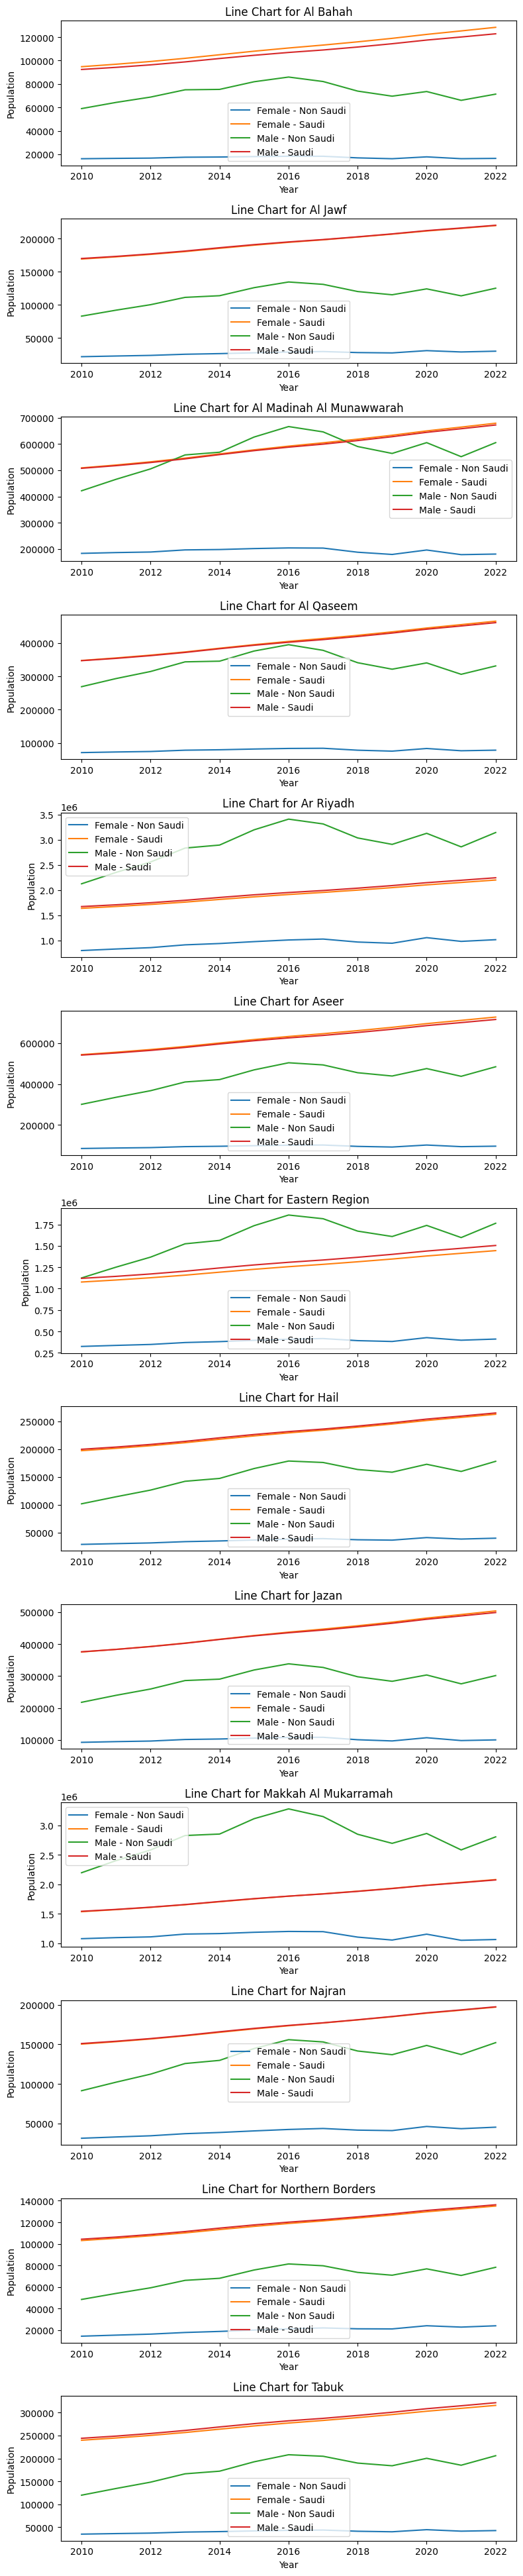

In [ ]:
grouped_df = df.groupby(['Region', 'Gender', 'Nationality', 'Year'])['Population'].sum().reset_index()

unique_regions = df['Region'].unique()

fig, axes = plt.subplots(nrows=len(unique_regions), ncols=1, figsize=(8, 3 * len(unique_regions)))

for i, region in enumerate(unique_regions):
    region_data = grouped_df[grouped_df['Region'] == region]
    for gender in region_data['Gender'].unique():
        for nationality in region_data['Nationality'].unique():
            subset_data = region_data[(region_data['Gender'] == gender) & (region_data['Nationality'] == nationality)]
            label = f'{gender} - {nationality}'
            axes[i].plot(subset_data['Year'], subset_data['Population'], label=label)

    axes[i].set_title(f'Line Chart for {region}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Population')
    axes[i].legend()

plt.tight_layout()
plt.show()

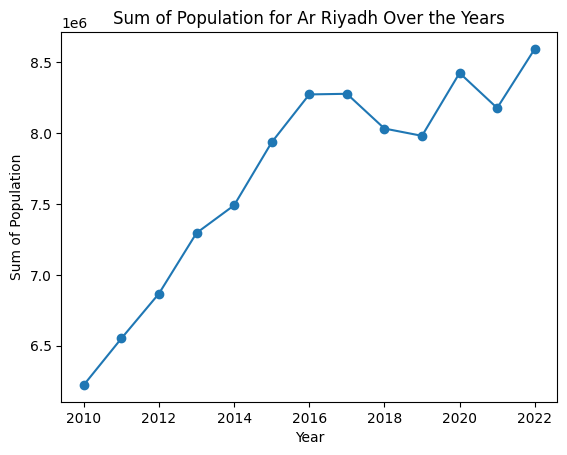

In [38]:
ar_riyadh_data = df[df['Region'] == 'Ar Riyadh']

sum_population_per_year = ar_riyadh_data.groupby('Year')['Population'].sum().reset_index()

plt.plot(sum_population_per_year['Year'], sum_population_per_year['Population'], marker='o')
plt.xlabel('Year')
plt.ylabel('Sum of Population')
plt.title('Sum of Population for Ar Riyadh Over the Years')
plt.show()



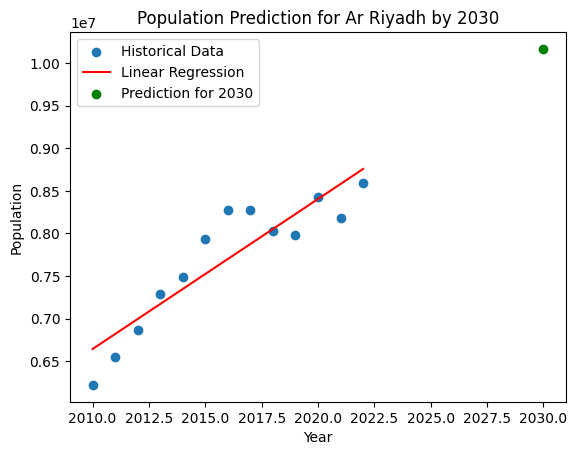

    Year  Population
0   2010     6224033
1   2011     6551735
2   2012     6867853
3   2013     7294753
4   2014     7489799
5   2015     7933711
6   2016     8271126
7   2017     8275538
8   2018     8030674
9   2019     7979262
10  2020     8422408
11  2021     8175378
12  2022     8591748
Predicted Population for Ar Riyadh in 2030: 10163680.54


In [39]:
X = sum_population_per_year['Year'].values.reshape(-1, 1)
y = sum_population_per_year['Population'].values


model = LinearRegression()
model.fit(X, y)


year_2030 = np.array([[2030]])
predicted_population_2030 = model.predict(year_2030)


plt.scatter(X, y, label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(2030, predicted_population_2030, color='green', label='Prediction for 2030')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Prediction for Ar Riyadh by 2030')
plt.legend()
plt.show()


print(sum_population_per_year)
print(f'Predicted Population for Ar Riyadh in 2030: {predicted_population_2030[0]:.2f}')